In [2]:
# from http://dspace.ut.ee/bitstream/handle/10062/57948/jarvsoo_johanna_adele_2017.pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [3]:
np.random.seed(0)
#the expectation and variance of x0
mu0=0.1
sigmaruut0=10

muw=0 # zero mean process noise
muv=0 # zero mean measurement noise
#the length of time period
T=50

z = np.zeros(T+1)
y = np.zeros(T+1)
z[0] = 0.1
y[0] = 0.05*z[0]**2 + np.random.normal(0, np.sqrt(1))
for k in range(0,T):
    z[k+1] = 0.5*z[k] + 25*z[k]/(1+z[k]**2) + 8*np.cos(1.2*k) + np.random.normal(0, np.sqrt(10))
    y[k+1] = 0.05*z[k+1]**2 + np.random.normal(0, np.sqrt(1))

In [4]:
def g(z):
    return 0.5*z + 25*z/(1+z**2) 

def h(z):
    return 0.05*z**2

In [5]:
def EKF(Q,R):
    mu = np.zeros((T+1, T+1))
    mu[0, 0]=mu0
 
    sigmaruut = np.zeros((T+1, T+1))
    sigmaruut[0, 0]=sigmaruut0
    
    #EKF algorithm 
    for i in range(0,T):
        #prediction step
        mu[i+1,i] = 0.5*mu[i,i] + 25*mu[i,i]/(1+mu[i,i]**2) + 8*np.cos(1.2*i)
        sigmaruut[i+1,i]=(derivative(g,mu[i,i])**2*sigmaruut[i,i]+Q)
        #measurement step
        Kt=sigmaruut[i+1,i]*derivative(h,mu[i+1,i])*(1/(derivative(h,mu[i+1,i])**2*sigmaruut[i+1,i]+R))
        mu[i+1,i+1]=mu[i+1,i]+Kt*(y[i+1]-h(mu[i+1,i]))
        sigmaruut[i+1, i+1]=(1-Kt*derivative(h,mu[i+1,i]))*sigmaruut[i+1,i]
    return z,y,mu.diagonal()

In [6]:
def jon(z,y,mu,Qt,Rt):
    plt.plot(t, mu, label=r"EKF␣$\tilde{\mu}_t$")
    plt.plot(t, z, label=r"$z_t$")
    plt.xlabel('time')
    plt.ylabel('state␣value')
    plt.title (r"$Q_t=$"+str(Qt)+r",␣$R_t=$"+str(Rt))
    plt.plot(t, y, 'x', label=r"$y_t$")
    #plt.ylim([-10,30])
    plt.legend(loc='best')

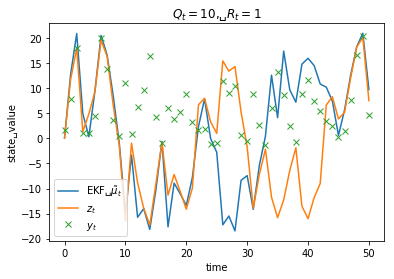

In [7]:
z,y,mu=EKF(10,1)
t = range(0,T+1)
jon(z,y,mu,10,1)

In [8]:
np.save('estimates/exf_x.npy', mu)